## CSE-221710309048-Pranav Sundaresan Babu

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

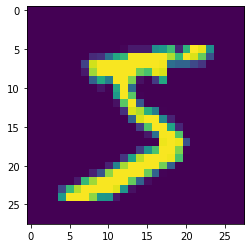

In [6]:
plt.imshow(train_digits[0])

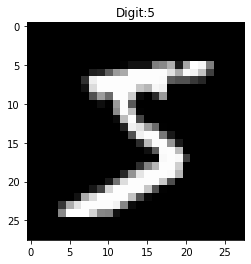

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

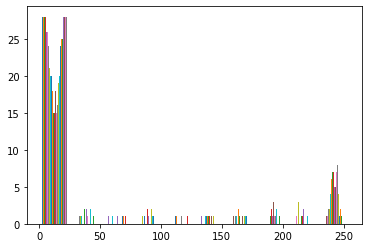

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([ 9038, 13080, 42693, 53534, 25303, 12433, 48992, 55453, 30801,
       58092, 40715,   109, 10577, 11371, 47860, 11759])

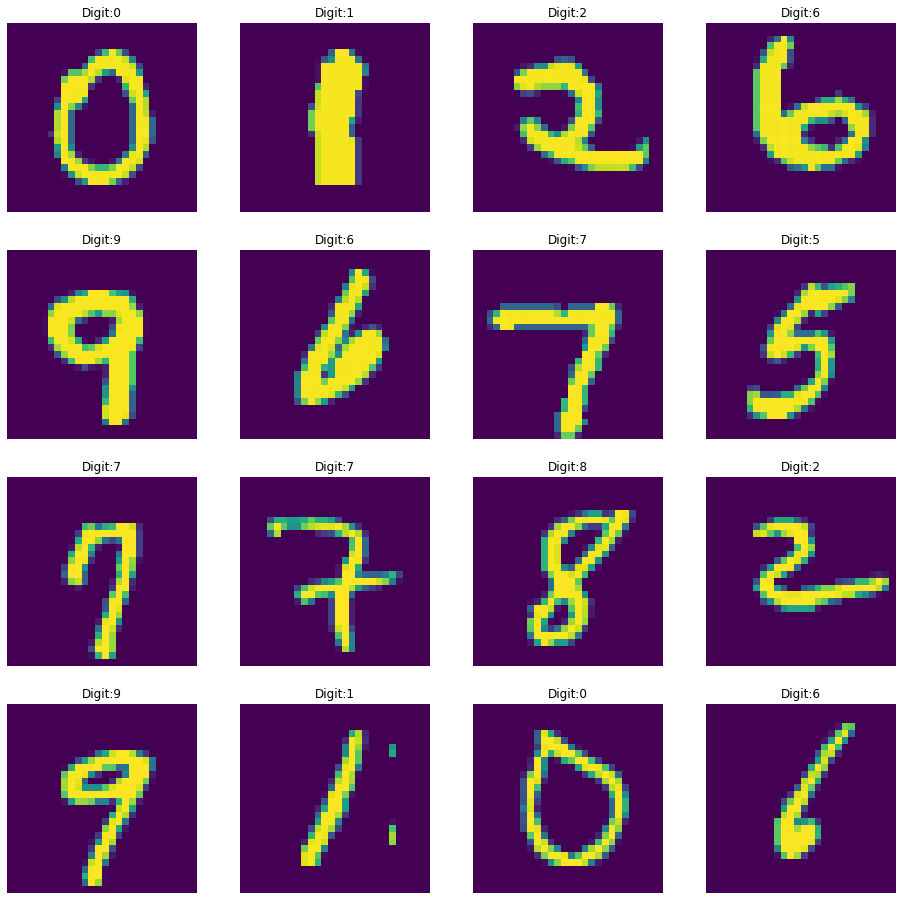

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.2497 - accuracy: 0.9242 - val_loss: 0.1376 - val_accuracy: 0.9610
Epoch 2/5
54000/54000 [==============================] - 6s 105us/step - loss: 0.1119 - accuracy: 0.9662 - val_loss: 0.1282 - val_accuracy: 0.9620
Epoch 3/5
54000/54000 [==============================] - 6s 104us/step - loss: 0.0805 - accuracy: 0.9752 - val_loss: 0.1118 - val_accuracy: 0.9705
Epoch 4/5
54000/54000 [==============================] - 6s 104us/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.1112 - val_accuracy: 0.9723
Epoch 5/5
54000/54000 [==============================] - 6s 106us/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0988 - val_accuracy: 0.9735


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 27us/step


[0.09020732537787407, 0.9740999937057495]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.9043390e-08, 2.5800846e-05, 3.1680636e-05, 6.9812423e-04,
        1.4493833e-07, 6.0226364e-07, 3.3935579e-10, 9.9920899e-01,
        1.6592344e-06, 3.2890948e-05]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[4.9043390e-08, 2.5800820e-05, 3.1680578e-05, 6.9812388e-04,
        1.4493818e-07, 6.0226364e-07, 3.3935452e-10, 9.9920899e-01,
        1.6592312e-06, 3.2890919e-05],
       [3.1484697e-09, 5.5573960e-06, 9.9999416e-01, 2.3202180e-08,
        4.5771686e-10, 2.5651897e-10, 7.0335723e-08, 2.9702925e-09,
        5.9636591e-08, 4.6518670e-13],
       [1.8852387e-07, 9.9977785e-01, 7.3138217e-06, 5.4397060e-07,
        2.0894437e-05, 1.4819434e-06, 7.1814084e-06, 2.7940441e-05,
        1.5412169e-04, 2.5319343e-06],
       [9.9877924e-01, 6.0002517e-06, 1.9897183e-04, 4.8054986e-05,
        3.0983665e-05, 7.0027229e-05, 5.6714733e-04, 4.7486092e-06,
        2.8774413e-05, 2.6605171e-04],
       [2.7227425e-06, 4.8576708e-06, 1.0404176e-05, 1.2008526e-07,
        9.9588901e-01, 4.4312305e-06, 3.7252050e-06, 2.1438262e-05,
        1.9071849e-04, 3.8725573e-03],
       [2.4239116e-08, 9.9993050e-01, 6.1451482e-07, 6.3238055e-08,
        6.5889567e-06, 4.7245280e-08, 3.1932882e-07, 1.37

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.9043390e-08, 2.5800846e-05, 3.1680636e-05, 6.9812423e-04,
        1.4493833e-07, 6.0226364e-07, 3.3935579e-10, 9.9920899e-01,
        1.6592344e-06, 3.2890948e-05]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.92422223, 0.9662037, 0.97524077, 0.9807037, 0.9837963],
 'loss': [0.24969476152045858,
  0.11188658725497899,
  0.08053271338678207,
  0.06294501732753728,
  0.05319290622034869],
 'val_accuracy': [0.9610000252723694,
  0.9620000123977661,
  0.9704999923706055,
  0.9723333120346069,
  0.9735000133514404],
 'val_loss': [0.1375570111523072,
  0.12818200017511844,
  0.11175377818072836,
  0.11117228539288045,
  0.09879470913872744]}

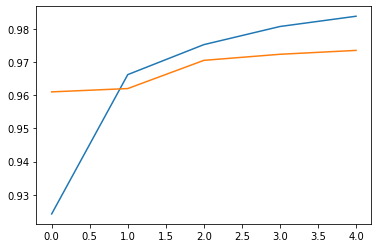

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.2605 - accuracy: 0.9222 - val_loss: 0.1408 - val_accuracy: 0.9593
Epoch 2/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.1136 - accuracy: 0.9651 - val_loss: 0.1224 - val_accuracy: 0.9677
Epoch 3/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0810 - accuracy: 0.9746 - val_loss: 0.1072 - val_accuracy: 0.9708
Epoch 4/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0632 - accuracy: 0.9811 - val_loss: 0.0871 - val_accuracy: 0.9763
Epoch 5/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.1059 - val_accuracy: 0.9743


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.0963582107585622, 0.9739000201225281]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.9043390e-08, 2.5800846e-05, 3.1680636e-05, 6.9812423e-04,
        1.4493833e-07, 6.0226364e-07, 3.3935579e-10, 9.9920899e-01,
        1.6592344e-06, 3.2890948e-05]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[4.9043390e-08, 2.5800820e-05, 3.1680578e-05, 6.9812388e-04,
        1.4493818e-07, 6.0226364e-07, 3.3935452e-10, 9.9920899e-01,
        1.6592312e-06, 3.2890919e-05],
       [3.1484697e-09, 5.5573960e-06, 9.9999416e-01, 2.3202180e-08,
        4.5771686e-10, 2.5651897e-10, 7.0335723e-08, 2.9702925e-09,
        5.9636591e-08, 4.6518670e-13],
       [1.8852387e-07, 9.9977785e-01, 7.3138217e-06, 5.4397060e-07,
        2.0894437e-05, 1.4819434e-06, 7.1814084e-06, 2.7940441e-05,
        1.5412169e-04, 2.5319343e-06],
       [9.9877924e-01, 6.0002517e-06, 1.9897183e-04, 4.8054986e-05,
        3.0983665e-05, 7.0027229e-05, 5.6714733e-04, 4.7486092e-06,
        2.8774413e-05, 2.6605171e-04],
       [2.7227425e-06, 4.8576708e-06, 1.0404176e-05, 1.2008526e-07,
        9.9588901e-01, 4.4312305e-06, 3.7252050e-06, 2.1438262e-05,
        1.9071849e-04, 3.8725573e-03],
       [2.4239116e-08, 9.9993050e-01, 6.1451482e-07, 6.3238055e-08,
        6.5889567e-06, 4.7245280e-08, 3.1932882e-07, 1.37

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.9043390e-08, 2.5800846e-05, 3.1680636e-05, 6.9812423e-04,
        1.4493833e-07, 6.0226364e-07, 3.3935579e-10, 9.9920899e-01,
        1.6592344e-06, 3.2890948e-05]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.9222222, 0.9650926, 0.9746111, 0.9811111, 0.98377776],
 'loss': [0.2605227949304713,
  0.11361272540419466,
  0.08099135366944527,
  0.06323173592556958,
  0.05249371395367457],
 'val_accuracy': [0.9593333601951599,
  0.9676666855812073,
  0.9708333611488342,
  0.9763333201408386,
  0.9743333458900452],
 'val_loss': [0.1407896913215518,
  0.122365294209371,
  0.10718568024411798,
  0.08713214720785618,
  0.10593903308020283]}

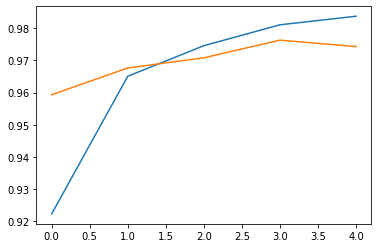

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])